# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559700 sha256=4378fb43fb11c305a03a0de6be9cf0951f525afe9da79746a647086b86f2c28e
  Stored in directory: c:\users\ehvar\appdata\local\pip\cache\wheels\6d\df\5e\ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
print("Beginning Data Retrieval")
print("------------------------")


url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID={weather_api_key}"

city_data = []

record_count = 1
set_count = 1


for i, city in enumerate(cities):
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    city_url = f"{url}&q={city}"
    
    print(f"Processing city #{record_count} in group #{set_count} | {city}")
    record_count += 1
    
    
    try:
        city_weather = requests.get(city_url).json()
        
        time.sleep(2)
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"] ["humidity"]
        city_clouds = city_weather["clouds"] ["all"]
        city_wind = city_weather["wind"] ["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    except:
        print(f"{city} has an error. Skiping...")
        pass
 

print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Beginning Data Retrieval
------------------------
Processing city #1 in group #1 | manicore
Processing city #2 in group #1 | buraydah
Processing city #3 in group #1 | kapaa
Processing city #4 in group #1 | vaini
Processing city #5 in group #1 | abu kamal
Processing city #6 in group #1 | luganville
Processing city #7 in group #1 | kurchum
Processing city #8 in group #1 | belushya guba
belushya guba has an error. Skiping...
Processing city #9 in group #1 | bodden town
Processing city #10 in group #1 | kaele
Processing city #11 in group #1 | yellowknife
Processing city #12 in group #1 | didwana
Processing city #13 in group #1 | barrow
Processing city #14 in group #1 | lebu
Processing city #15 in group #1 | hofn
Processing city #16 in group #1 | engen
Processing city #17 in group #1 | port alfred
Processing city #18 in group #1 | saint-michel-des-saints
Processing city #19 in group #1 | matay
Processing city #20 in group #1 | akdagmadeni
Processing city #21 in group #1 | new norfolk
Proces

Processing city #27 in group #4 | bonavista
Processing city #28 in group #4 | te anau
Processing city #29 in group #4 | rio gallegos
Processing city #30 in group #4 | butaritari
Processing city #31 in group #4 | rassvet
Processing city #32 in group #4 | santiago de cuba
Processing city #33 in group #4 | labytnangi
Processing city #34 in group #4 | kiunga
Processing city #35 in group #4 | la sarre
Processing city #36 in group #4 | itoman
Processing city #37 in group #4 | nemuro
Processing city #38 in group #4 | hun
Processing city #39 in group #4 | karaj
Processing city #40 in group #4 | kyabe
Processing city #41 in group #4 | vila franca do campo
Processing city #42 in group #4 | omboue
Processing city #43 in group #4 | opuwo
Processing city #44 in group #4 | belyy yar
Processing city #45 in group #4 | kalianget
Processing city #46 in group #4 | lavrentiya
Processing city #47 in group #4 | caconda
Processing city #48 in group #4 | wajid
Processing city #49 in group #4 | asau
Processing

Processing city #6 in group #8 | loukhi
Processing city #7 in group #8 | porto seguro
Processing city #8 in group #8 | louisbourg
louisbourg has an error. Skiping...
Processing city #9 in group #8 | brandenburg
Processing city #10 in group #8 | oranjestad
Processing city #11 in group #8 | sai buri
Processing city #12 in group #8 | jalu
Processing city #13 in group #8 | baykalsk
Processing city #14 in group #8 | vetlanda
Processing city #15 in group #8 | anori
Processing city #16 in group #8 | pilar do sul
Processing city #17 in group #8 | fairbanks
Processing city #18 in group #8 | aflu
aflu has an error. Skiping...
Processing city #19 in group #8 | dungarvan
Processing city #20 in group #8 | manuk mangkaw
Processing city #21 in group #8 | narsaq
Processing city #22 in group #8 | morlaix
Processing city #23 in group #8 | villa maria
Processing city #24 in group #8 | ixtapa
Processing city #25 in group #8 | papara
Processing city #26 in group #8 | muros
Processing city #27 in group #8 |

cam pha has an error. Skiping...
Processing city #27 in group #11 | abbeville
Processing city #28 in group #11 | manado
Processing city #29 in group #11 | chapleau
Processing city #30 in group #11 | ipatovo
Processing city #31 in group #11 | mahon
Processing city #32 in group #11 | biak
Processing city #33 in group #11 | la ronge
Processing city #34 in group #11 | tabarqah
tabarqah has an error. Skiping...
Processing city #35 in group #11 | alotau
alotau has an error. Skiping...
Processing city #36 in group #11 | araouane
Processing city #37 in group #11 | tome-acu
tome-acu has an error. Skiping...
Processing city #38 in group #11 | killam
Processing city #39 in group #11 | dunedin
Processing city #40 in group #11 | hanzhong
Processing city #41 in group #11 | vangaindrano
Processing city #42 in group #11 | kwinana
Processing city #43 in group #11 | chulumani
Processing city #44 in group #11 | hunchun
Processing city #45 in group #11 | bagotville
Processing city #46 in group #11 | saint

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,manicore,-5.8092,-61.3003,83.28,80,100,2.13,BR,1643990066
1,buraydah,26.3260,43.9750,75.65,31,51,12.55,SA,1643989859
2,kapaa,22.0752,-159.3190,66.18,88,0,6.91,US,1643989853
3,vaini,-21.2000,-175.2000,79.84,84,100,20.33,TO,1643989853
4,abu kamal,34.4506,40.9171,55.87,46,73,16.80,SY,1643990075


In [8]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,19.960022,19.222745,51.470605,71.749110,59.756228,9.020214,1.643991e+09
std,32.958784,89.535021,32.315880,22.000957,40.220772,6.544525,4.258001e+02
min,-54.800000,-179.166700,-39.890000,5.000000,0.000000,0.000000,1.643990e+09
25%,-6.216700,-61.184925,29.552500,61.000000,14.000000,4.075000,1.643990e+09
50%,22.628650,21.582000,61.465000,77.000000,75.000000,7.840000,1.643991e+09
75%,47.188800,98.384400,77.867500,88.000000,100.000000,12.620000,1.643991e+09
max,78.218600,179.316700,100.580000,100.000000,100.000000,46.640000,1.643992e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index

print(dirty_city_data)


Int64Index([], dtype='int64')


In [14]:
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,manicore,-5.8092,-61.3003,83.28,80,100,2.13,BR,1643990066
1,buraydah,26.3260,43.9750,75.65,31,51,12.55,SA,1643989859
2,kapaa,22.0752,-159.3190,66.18,88,0,6.91,US,1643989853
3,vaini,-21.2000,-175.2000,79.84,84,100,20.33,TO,1643989853
4,abu kamal,34.4506,40.9171,55.87,46,73,16.80,SY,1643990075


In [15]:
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

clean_city_data.to_csv(output_data_file, index_label="City_TD")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

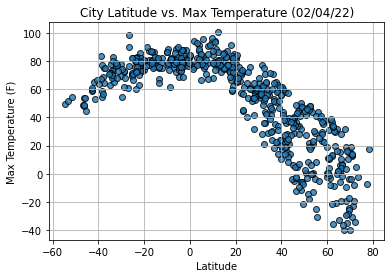

In [20]:
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig1.png")

## Latitude vs. Humidity Plot

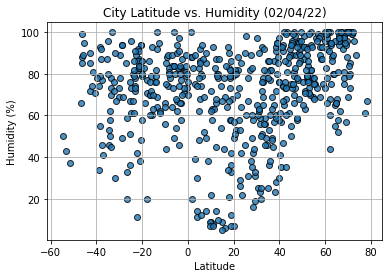

In [21]:
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig2.png")

## Latitude vs. Cloudiness Plot

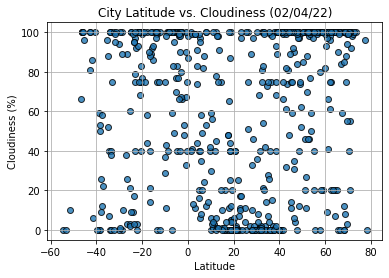

In [22]:
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig3.png")

## Latitude vs. Wind Speed Plot

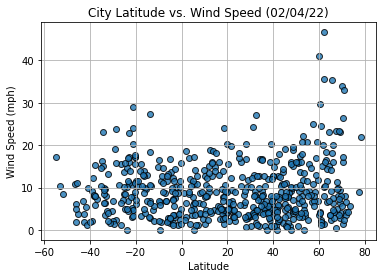

In [23]:
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig4.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [37]:
def plot_linear_regression(x_values, y_values, title, text_coordinates): 
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"the r-value is: {rvalue**2}")
    plt.show()

In [38]:
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

the r-value is: 0.740109539554844


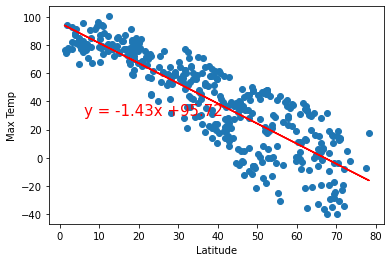

In [39]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-value is: 0.43098286639113736


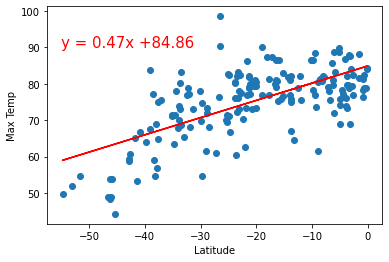

In [41]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55,90))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is: 0.2074083806535878


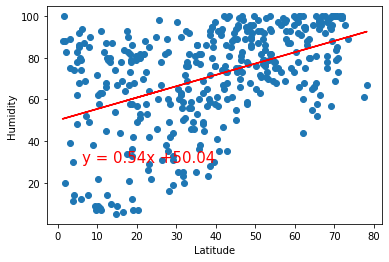

In [42]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (6,30))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is: 0.01717297827909681


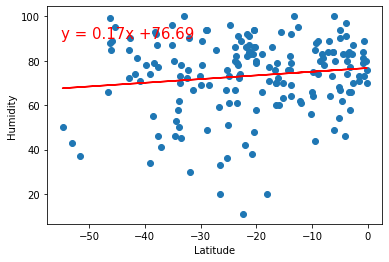

In [43]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-55,90))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is: 0.13678742310643413


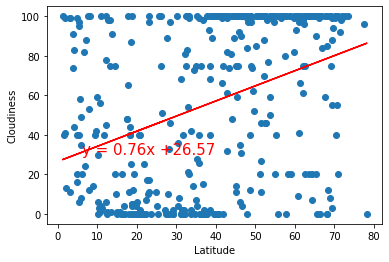

In [44]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (6,30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is: 0.0690626219274173


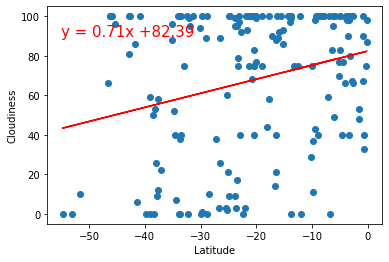

In [45]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-55,90))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is: 0.03081433007920672


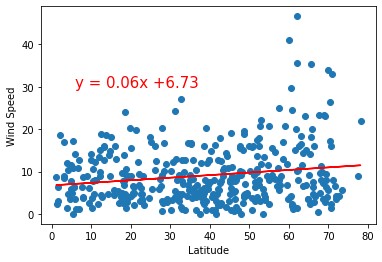

In [46]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (6,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is: 0.003219208566890362


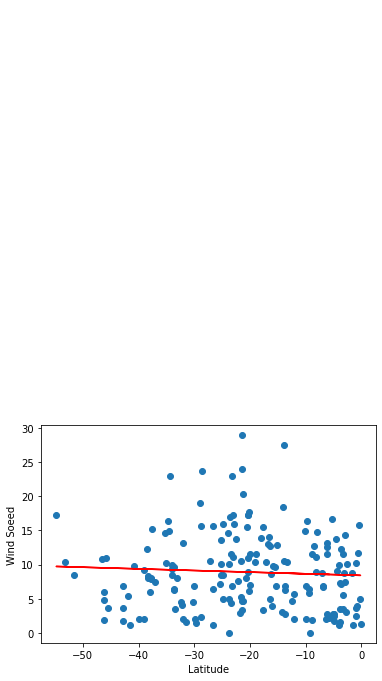

In [47]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Soeed', (-55,90))